#####**PSNR**

In [ ]:
import numpy 
import math
import cv2
original = cv2.imread("/content/drive/MyDrive/Evaluation_Metric/secret7.png")
contrast = cv2.imread("/content/drive/MyDrive/Evaluation_Metric/decrypted7.png")
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    mse=mse/2
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
    
d=psnr(original,contrast)
print("PSNR: ", d)

loss=(48-d)*100/48
print("PSNR Loss=",loss)

PSNR:  41.78709625740858
PSNR Loss= 12.943549463732131


#####**SSIM**

In [ ]:
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
# 3. Load the two input images
imageA = cv2.imread("/content/drive/MyDrive/Evaluation_Metric/secret7.png")
imageB = cv2.imread("/content/drive/MyDrive/Evaluation_Metric/decrypted7.png")

# 4. Convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# 5. Compute the Structural Similarity Index (SSIM) between the two
#    images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")

# 6. You can print only the score if you want
print("SSIM: {}".format(score))

SSIM: 0.9579188124837831


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


##### **HISTOGRAM**

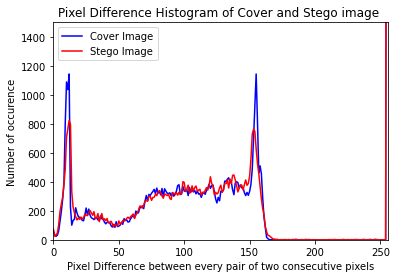

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('/content/drive/MyDrive/Evaluation_Metric/secret7.png', -1)
img2 = cv2.imread('/content/drive/MyDrive/Evaluation_Metric/decrypted7.png', -1)
fig, ax = plt.subplots()
histr = cv2.calcHist([img1],[2],None,[256],[0,256])
histr1 = cv2.calcHist([img2],[2],None,[256],[0,256])
plt.plot(histr,color = 'b') 
plt.plot(histr1,color = 'r')
plt.xlim([0,256])
plt.ylim([0,1500])
ax.legend(['Cover Image', 'Stego Image'], loc='upper left')    
plt.title('Pixel Difference Histogram of Cover and Stego image ')
plt.xlabel('Pixel Difference between every pair of two consecutive pixels')
plt.ylabel('Number of occurence')
metric_val = cv2.compareHist(histr, histr1, cv2.HISTCMP_CORREL)
plt.show()

##### **CORELATION**

In [ ]:
import cv2
img1 = cv2.imread('/content/drive/MyDrive/Evaluation_Metric/cover7.png')
img2 = cv2.imread('/content/drive/MyDrive/Evaluation_Metric/stego7.png')

# Convert it to HSV
img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
 
# Calculate the histogram and normalize it
hist_img1 = cv2.calcHist([img1_hsv], [0,1], None, [180,256], [0,180,0,256])
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
hist_img2 = cv2.calcHist([img2_hsv], [0,1], None, [180,256], [0,180,0,256])
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
 
# find the metric value
metric_val = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CORREL )


print(metric_val)

0.9346523131797626


##### **INTERSECTION**

In [ ]:
import cv2
img1 = cv2.imread('/content/drive/MyDrive/Evaluation_Metric/secret7.png')
img2 = cv2.imread('/content/drive/MyDrive/Evaluation_Metric/decrypted7.png')

# Convert it to HSV
img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
 
# Calculate the histogram and normalize it
hist_img1 = cv2.calcHist([img1_hsv], [0,1], None, [180,256], [0,180,0,256])
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
hist_img2 = cv2.calcHist([img2_hsv], [0,1], None, [180,256], [0,180,0,256])
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
 
# find the metric value
metric_val = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_INTERSECT )


print(metric_val)

0.9999999403953552
